In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from qutip import *
about()


QuTiP: Quantum Toolbox in Python
Copyright (c) QuTiP team 2011 and later.
Original developers: R. J. Johansson & P. D. Nation.
Current admin team: Alexander Pitchford, Paul D. Nation, Nathan Shammah, Shahnawaz Ahmed, Neill Lambert, and Eric Giguère.
Project Manager: Franco Nori.
Currently developed through wide collaboration. See https://github.com/qutip for details.

QuTiP Version:      4.4.1
Numpy Version:      1.17.4
Scipy Version:      1.3.1
Cython Version:     0.29.14
Matplotlib Version: 3.1.1
Python Version:     3.7.5
Number of CPUs:     6
BLAS Info:          INTEL MKL
OPENMP Installed:   False
INTEL MKL Ext:      True
Platform Info:      Darwin (x86_64)
Installation path:  /opt/anaconda3/lib/python3.7/site-packages/qutip
Please cite QuTiP in your publication.
For your convenience a bibtex reference can be easily generated using `qutip.cite()`


In [2]:
#Define Relevant Hamiltonian Parameters
omega = 2*np.pi*6e3 #Transmon resonance frequency in MHz i.e. 6,000 MHz or 6 GHz.  This sets our time to be in microseconds
alpha = 2*np.pi*3e2 #Transmon anharmonicity in MHZ i.e. 300 MHz.

In [3]:
#Define the Linear algebra
N = 3 #The maximum occupancy size we will allow.  This treats the transmon as a three level system
g = basis(N,0)
e = basis(N,1)
f = basis(N,2)

In [4]:
print("Ground state")
print(g)
print("Excited state")
print(e)
print("Second excited state")
print(f)

Ground state
Quantum object: dims = [[3], [1]], shape = (3, 1), type = ket
Qobj data =
[[1.]
 [0.]
 [0.]]
Excited state
Quantum object: dims = [[3], [1]], shape = (3, 1), type = ket
Qobj data =
[[0.]
 [1.]
 [0.]]
Second excited state
Quantum object: dims = [[3], [1]], shape = (3, 1), type = ket
Qobj data =
[[0.]
 [0.]
 [1.]]


In [5]:
#Define the transmon Hamiltonian, with the reduced Plank's constant set to 1 
A = destroy(N) #This destroys one excitation spanned by the space of N.  A.dag() creates one excitation
Ht = omega*A.dag()*A-.5*alpha*A.dag()*A.dag()*A*A
Hho = omega*A.dag()*A

In [6]:
#Let's look at the eigenenergies of the transmon Hamiltonian
print("Harmonic oscillator eigenenergies")
print(np.power(2*np.pi,-1)*Hho.eigenenergies())
print("Transmon eigenenergies")
print(np.power(2*np.pi,-1)*Ht.eigenenergies())

Harmonic oscillator eigenenergies
[    0.  6000. 12000.]
Transmon eigenenergies
[    0.  6000. 11700.]


In [7]:
A.dag()*A

Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = True
Qobj data =
[[0. 0. 0.]
 [0. 1. 0.]
 [0. 0. 2.]]

In [8]:
#Let's make a unitary transformation into the frame of the Transmon with the reduced Plank's constant set to 1 
Ht_rf = -.5*alpha*A.dag()*A.dag()*A*A
Hho_rf = 0*Hho

In [9]:
#Let's look at the eigenenergies of the transmon Hamiltonian in the rotating frame
print("Harmonic oscillator eigenenergies in rotating frame")
print(np.power(2*np.pi,-1)*Hho_rf.eigenenergies())
print("Transmon eigenenergies in rotating frame")
print(np.power(2*np.pi,-1)*Ht_rf.eigenenergies())

Harmonic oscillator eigenenergies in rotating frame
[0. 0. 0.]
Transmon eigenenergies in rotating frame
[-300.    0.    0.]


In [10]:
tlist = np.linspace(0,10,10000)
c_ops = [] #collapse operators 
e_ops = [g*g.dag(),e*e.dag(),f*f.dag(),(g+e),(g-e)] #expectation values

In [11]:
print(tlist)

[0.00000000e+00 1.00010001e-03 2.00020002e-03 ... 9.99799980e+00
 9.99899990e+00 1.00000000e+01]


In [12]:
result = mesolve(Ht_rf,(g+e).unit(),tlist,c_ops,e_ops)

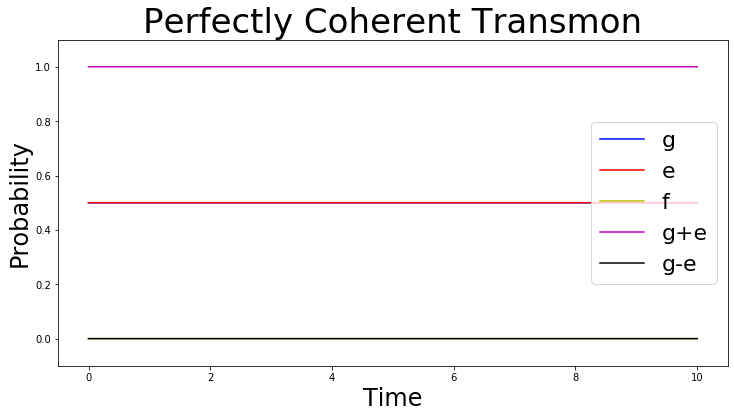

In [13]:
fig, ax = plt.subplots(figsize=(12,6))
plt.rcParams.update({'font.size': 22});
ax.plot(tlist, np.real(result.expect[0]), 'b')
ax.plot(tlist, np.real(result.expect[1]), 'r')
ax.plot(tlist, np.real(result.expect[2]), 'y')
ax.plot(tlist, np.real(result.expect[3]), 'm')
ax.plot(tlist, np.real(result.expect[4]), 'k')
ax.legend(("g", "e", "f", "g+e", "g-e"))
ax.set_xlabel('Time',fontsize=24)
ax.set_ylabel('Probability',fontsize=24);
plt.ylim([-.1,1.1]);
plt.title("Perfectly Coherent Transmon",fontsize=34);

In [14]:
#Define photon dissapation
c_ops_dis = []
kappa_dis = np.power(1.0,-1)#microsecond T1
c_ops_dis.append(np.sqrt(kappa_dis)*A)
e_ops_dis = [g*g.dag(),e*e.dag(),f*f.dag(),(g+e).unit()*(g+e).unit().dag(),(g-e).unit()*(g-e).unit().dag()]

In [15]:
print(((g+e)*(g+e).dag()).unit())

Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = True
Qobj data =
[[0.5 0.5 0. ]
 [0.5 0.5 0. ]
 [0.  0.  0. ]]


In [16]:
result_dis = mesolve(Ht_rf,e,tlist,c_ops_dis,e_ops_dis)

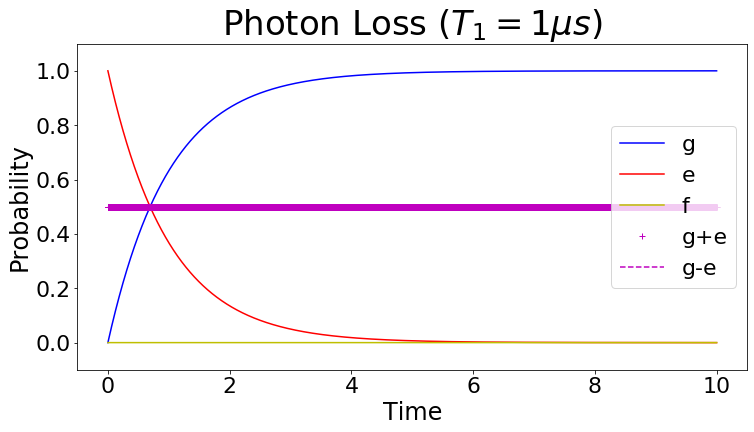

In [17]:
fig, ax = plt.subplots(figsize=(12,6))
plt.rcParams.update({'font.size': 22});
ax.plot(tlist, np.real(result_dis.expect[0]), 'b')
ax.plot(tlist, np.real(result_dis.expect[1]), 'r')
ax.plot(tlist, np.real(result_dis.expect[2]), 'y')
ax.plot(tlist, np.real(result_dis.expect[3]), 'm+')
ax.plot(tlist, np.real(result_dis.expect[4]), 'm--')
ax.legend(("g", "e", "f","g+e","g-e"))
ax.set_xlabel('Time',fontsize=24)
ax.set_ylabel('Probability',fontsize=24);
plt.ylim([-.1,1.1]);
plt.title("Photon Loss ($T_1=1\mu s$)",fontsize=34);

In [18]:
#Define state dephasing
tlist_dep = np.linspace(0,10,100)
c_ops_dep = []
kappa_dep = 1#2 microsecond dephasing time
c_ops_dep.append(np.sqrt(kappa_dep)*A.dag()*A) #dephasing term
e_ops_dep = [g*g.dag(),e*e.dag(),f*f.dag(),(g+e).unit()*(g+e).unit().dag(),(g-e).unit()*(g-e).unit().dag()]

In [19]:
result_dep = mesolve(Ht_rf,(g+e).unit(),tlist_dep,c_ops_dep,e_ops_dep)

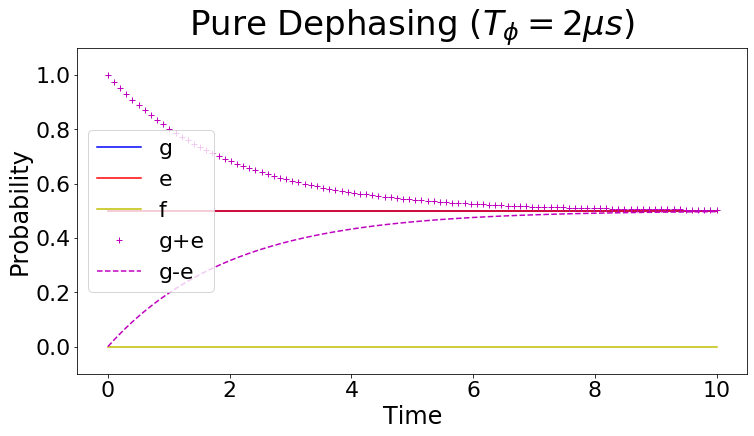

In [20]:
fig, ax = plt.subplots(figsize=(12,6))
plt.rcParams.update({'font.size': 22});
ax.plot(tlist_dep, np.real(result_dep.expect[0]), 'b')
ax.plot(tlist_dep, np.real(result_dep.expect[1]), 'r')
ax.plot(tlist_dep, np.real(result_dep.expect[2]), 'y')
ax.plot(tlist_dep, np.real(result_dep.expect[3]), 'm+')
ax.plot(tlist_dep, np.real(result_dep.expect[4]), 'm--')
ax.legend(("g", "e", "f","g+e","g-e"))
ax.set_xlabel('Time',fontsize=24)
ax.set_ylabel('Probability',fontsize=24);
plt.ylim([-.1,1.1]);
plt.title("Pure Dephasing ($T_{\phi}=2\mu s$)",fontsize=34);

In [21]:
#Dissapation and Dephasing
tlist = np.linspace(0,10,100)
c_ops = []
kappa_dep = .5# microsecond dephasing time
c_ops.append(np.sqrt(kappa_dep)*A.dag()*A) #dephasing term
kappa_dis = 1# microsecond T1
c_ops.append(np.sqrt(kappa_dis)*A)
e_ops = [g*g.dag(),e*e.dag(),f*f.dag(),(g+e).unit()*(g+e).unit().dag(),(g-e).unit()*(g-e).unit().dag()]

In [22]:
result = mesolve(Ht_rf,(g+e).unit(),tlist,c_ops,e_ops)

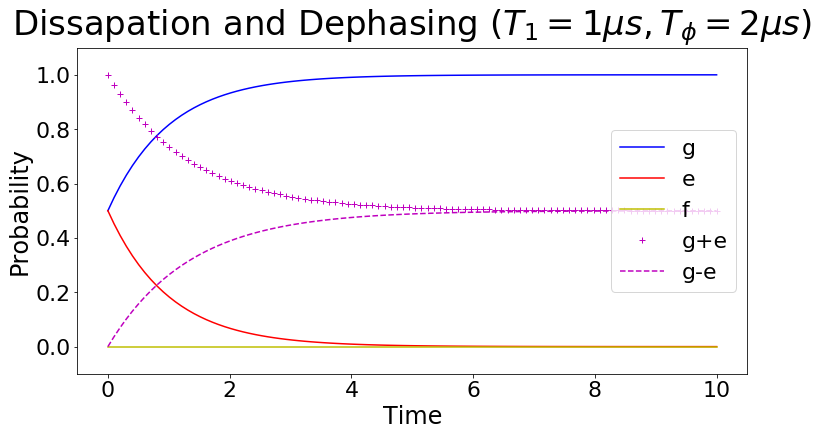

In [23]:
fig, ax = plt.subplots(figsize=(12,6))
plt.rcParams.update({'font.size': 22});
ax.plot(tlist, np.real(result.expect[0]), 'b')
ax.plot(tlist, np.real(result.expect[1]), 'r')
ax.plot(tlist, np.real(result.expect[2]), 'y')
ax.plot(tlist, np.real(result.expect[3]), 'm+')
ax.plot(tlist, np.real(result.expect[4]), 'm--')
ax.legend(("g", "e", "f","g+e","g-e"))
ax.set_xlabel('Time',fontsize=24)
ax.set_ylabel('Probability',fontsize=24);
plt.ylim([-.1,1.1]);
plt.title("Dissapation and Dephasing ($T_1=1\mu s,T_{\phi}=2\mu s$)",fontsize=34);

In [24]:
#Dissapation, Dephasing, Thermal
tlist = np.linspace(0,10,1000)
c_ops_thm = []
kappa_dep = .5# microsecond dephasing time
c_ops_thm.append(np.sqrt(kappa_dep)*A.dag()*A) #dephasing term
kappa_dis = 1# microsecond T1
c_ops_thm.append(np.sqrt(kappa_dis)*A)
kappa_thm = .05*kappa_dis# microsecond T1
c_ops_thm.append(np.sqrt(kappa_thm)*A.dag())
e_ops = [g*g.dag(),e*e.dag(),f*f.dag(),(g+e).unit()*(g+e).unit().dag(),(g-e).unit()*(g-e).unit().dag()]

In [25]:
result_thm = mesolve(Ht_rf,(g+e).unit(),tlist,c_ops_thm,e_ops)

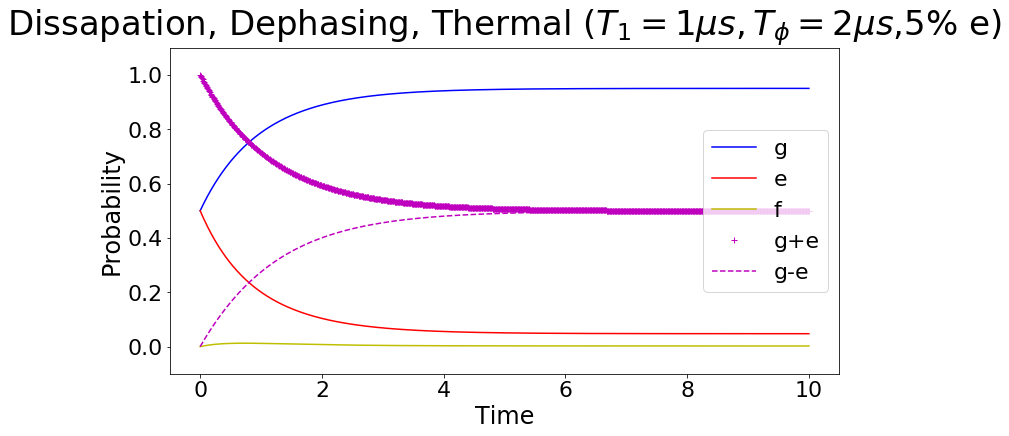

In [26]:
fig, ax = plt.subplots(figsize=(12,6))
plt.rcParams.update({'font.size': 22});
ax.plot(tlist, np.real(result_thm.expect[0]), 'b')
ax.plot(tlist, np.real(result_thm.expect[1]), 'r')
ax.plot(tlist, np.real(result_thm.expect[2]), 'y')
ax.plot(tlist, np.real(result_thm.expect[3]), 'm+')
ax.plot(tlist, np.real(result_thm.expect[4]), 'm--')
ax.legend(("g", "e", "f","g+e","g-e"))
ax.set_xlabel('Time',fontsize=24)
ax.set_ylabel('Probability',fontsize=24);
plt.ylim([-.1,1.1]);
plt.title("Dissapation, Dephasing, Thermal ($T_1=1\mu s,T_{\phi}=2\mu s$,5% e)",fontsize=34);

In [27]:
#MC Solve Dissapation, Dephasing, Thermal
tlist = np.linspace(0,10,1000)
ntraj = 1000
c_ops_thm = []
kappa_dep = .5# microsecond dephasing time
c_ops_thm.append(np.sqrt(kappa_dep)*A.dag()*A) #dephasing term
kappa_dis = 1# microsecond T1
c_ops_thm.append(np.sqrt(kappa_dis)*A)
kappa_thm = .05*kappa_dis# microsecond T1
c_ops_thm.append(np.sqrt(kappa_thm)*A.dag())
e_ops = [g*g.dag(),e*e.dag(),f*f.dag(),(g+e).unit()*(g+e).unit().dag(),(g-e).unit()*(g-e).unit().dag()]

In [28]:
result_thm_mc = mcsolve(Ht_rf,(g+e).unit(),tlist,c_ops_thm,e_ops,ntraj)

10.0%. Run time:   1.52s. Est. time left: 00:00:00:13
20.0%. Run time:   2.69s. Est. time left: 00:00:00:10
30.0%. Run time:   4.34s. Est. time left: 00:00:00:10
40.0%. Run time:   5.67s. Est. time left: 00:00:00:08
50.0%. Run time:   6.95s. Est. time left: 00:00:00:06
60.0%. Run time:   8.32s. Est. time left: 00:00:00:05
70.0%. Run time:  10.08s. Est. time left: 00:00:00:04
80.0%. Run time:  12.35s. Est. time left: 00:00:00:03
90.0%. Run time:  14.06s. Est. time left: 00:00:00:01
100.0%. Run time:  15.62s. Est. time left: 00:00:00:00
Total run time:  15.64s


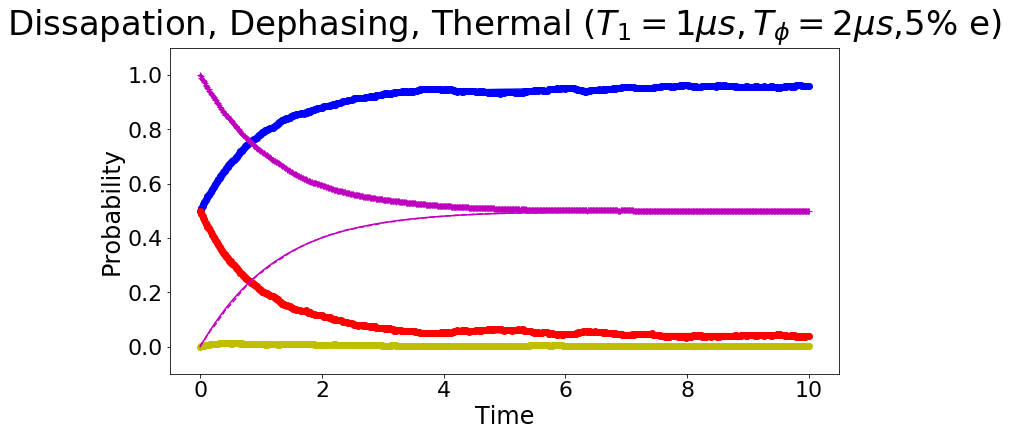

In [29]:
fig, ax = plt.subplots(figsize=(12,6))
plt.rcParams.update({'font.size': 22});
ax.plot(tlist, np.real(result_thm.expect[0]), 'b')
ax.plot(tlist, np.real(result_thm_mc.expect[0]), 'bo')
ax.plot(tlist, np.real(result_thm.expect[1]), 'r')
ax.plot(tlist, np.real(result_thm_mc.expect[1]), 'ro')
ax.plot(tlist, np.real(result_thm.expect[2]), 'y')
ax.plot(tlist, np.real(result_thm_mc.expect[2]), 'yo')
ax.plot(tlist, np.real(result_thm.expect[3]), 'm-')
ax.plot(tlist, np.real(result_thm_mc.expect[3]), 'm+')
ax.plot(tlist, np.real(result_thm.expect[4]), 'm-')
ax.plot(tlist, np.real(result_thm_mc.expect[4]), 'm--')
ax.set_xlabel('Time',fontsize=24)
ax.set_ylabel('Probability',fontsize=24);
plt.ylim([-.1,1.1]);
plt.title("Dissapation, Dephasing, Thermal ($T_1=1\mu s,T_{\phi}=2\mu s$,5% e)",fontsize=34);

In [30]:
#Driving the transmon
H_dre = 1*(A+A.dag());
H_re = Ht_rf + H_dre

In [31]:
#No dissapation and driving
tlist = np.linspace(0,10,1000)
c_ops = []
e_ops_re = [g*g.dag(),e*e.dag(),f*f.dag(),(g+e).unit()*(g+e).unit().dag(),(g-e).unit()*(g-e).unit().dag(),(g+1j*e).unit()*(g+1j*e).unit().dag(),(g-1j*e).unit()*(g-1j*e).unit().dag()]

In [32]:
result_dre = mesolve(H_re,g,tlist,c_ops,e_ops_re)

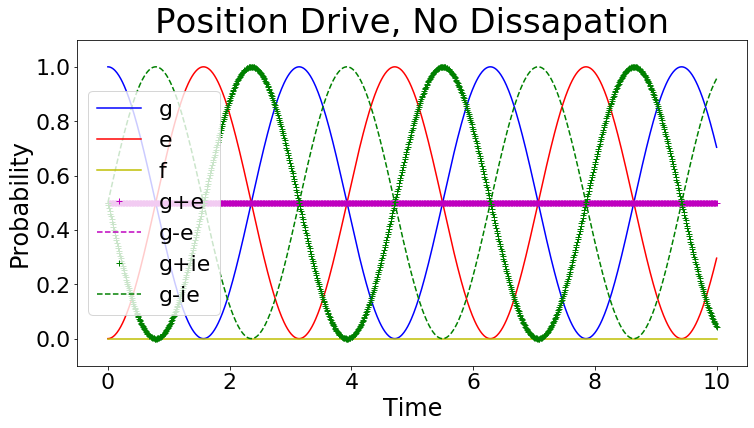

In [33]:
fig, ax = plt.subplots(figsize=(12,6))
plt.rcParams.update({'font.size': 22});
ax.plot(tlist, np.real(result_dre.expect[0]), 'b')
ax.plot(tlist, np.real(result_dre.expect[1]), 'r')
ax.plot(tlist, np.real(result_dre.expect[2]), 'y')
ax.plot(tlist, np.real(result_dre.expect[3]), 'm+')
ax.plot(tlist, np.real(result_dre.expect[4]), 'm--')
ax.plot(tlist, np.real(result_dre.expect[5]), 'g+')
ax.plot(tlist, np.real(result_dre.expect[6]), 'g--')
ax.legend(("g", "e", "f","g+e","g-e","g+ie","g-ie"))
ax.set_xlabel('Time',fontsize=24)
ax.set_ylabel('Probability',fontsize=24);
plt.ylim([-.1,1.1]);
plt.title("Position Drive, No Dissapation",fontsize=34);

In [34]:
#Driving the transmon
H_dim = 10j*(A-A.dag());
H_im = Ht_rf + H_dim

In [35]:
#No dissapation and driving
tlist = np.linspace(0,10,1000)
c_ops = []

In [36]:
result_dim = mesolve(H_im,g,tlist,c_ops,e_ops_re)

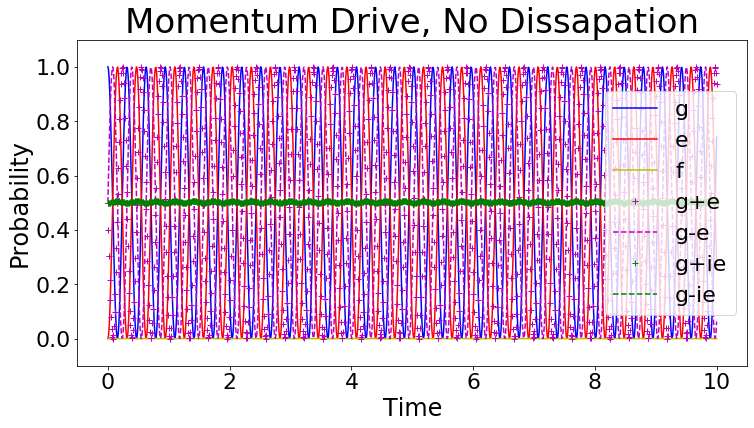

In [37]:
fig, ax = plt.subplots(figsize=(12,6))
plt.rcParams.update({'font.size': 22});
ax.plot(tlist, np.real(result_dim.expect[0]), 'b')
ax.plot(tlist, np.real(result_dim.expect[1]), 'r')
ax.plot(tlist, np.real(result_dim.expect[2]), 'y')
ax.plot(tlist, np.real(result_dim.expect[3]), 'm+')
ax.plot(tlist, np.real(result_dim.expect[4]), 'm--')
ax.plot(tlist, np.real(result_dim.expect[5]), 'g+')
ax.plot(tlist, np.real(result_dim.expect[6]), 'g--')
ax.legend(("g", "e", "f","g+e","g-e","g+ie","g-ie"))
ax.set_xlabel('Time',fontsize=24)
ax.set_ylabel('Probability',fontsize=24);
plt.ylim([-.1,1.1]);
plt.title("Momentum Drive, No Dissapation",fontsize=34);

In [38]:
result_dim_dis = mesolve(H_im,g,tlist,c_ops_thm,e_ops_re)

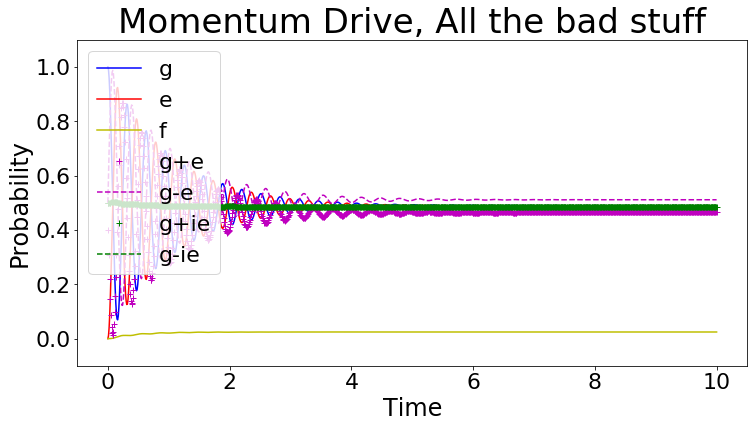

In [39]:
fig, ax = plt.subplots(figsize=(12,6))
plt.rcParams.update({'font.size': 22});
ax.plot(tlist, np.real(result_dim_dis.expect[0]), 'b')
ax.plot(tlist, np.real(result_dim_dis.expect[1]), 'r')
ax.plot(tlist, np.real(result_dim_dis.expect[2]), 'y')
ax.plot(tlist, np.real(result_dim_dis.expect[3]), 'm+')
ax.plot(tlist, np.real(result_dim_dis.expect[4]), 'm--')
ax.plot(tlist, np.real(result_dim_dis.expect[5]), 'g+')
ax.plot(tlist, np.real(result_dim_dis.expect[6]), 'g--')
ax.legend(("g", "e", "f","g+e","g-e","g+ie","g-ie"))
ax.set_xlabel('Time',fontsize=24)
ax.set_ylabel('Probability',fontsize=24);
plt.ylim([-.1,1.1]);
plt.title("Momentum Drive, All the bad stuff",fontsize=34);

# With Pulse

In [41]:
H_dt = -.5*alpha*A.dag()*A.dag()*A*A
H1 = (A+A.dag())
def H1_coeff(t, args):
    return args['A'] * np.exp(-((t-.5) / args['s']) ** 2)
H = [H_dt,[H1,H1_coeff]]
print(H)

[Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = True
Qobj data =
[[    0.             0.             0.        ]
 [    0.             0.             0.        ]
 [    0.             0.         -1884.95559215]], [Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = True
Qobj data =
[[0.         1.         0.        ]
 [1.         0.         1.41421356]
 [0.         1.41421356 0.        ]], <function H1_coeff at 0x1a25a06b00>]]


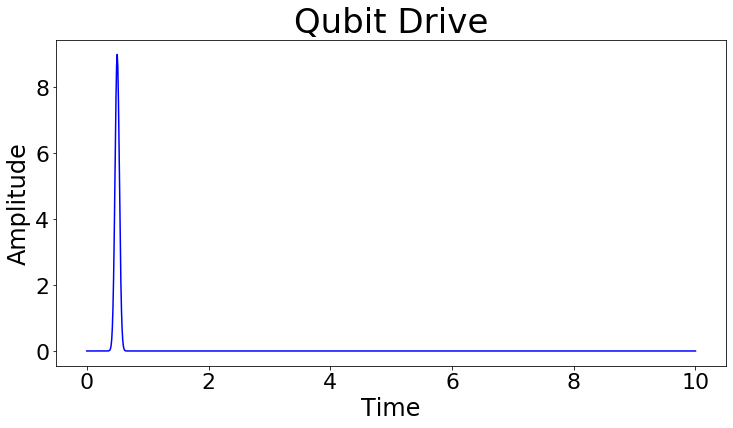

In [42]:
fig, ax = plt.subplots(figsize=(12,6))
plt.rcParams.update({'font.size': 22});
ax.plot(tlist, H1_coeff(tlist,args={'A': 9,'s':0.05}), 'b')
ax.set_xlabel('Time',fontsize=24)
ax.set_ylabel('Amplitude',fontsize=24);
plt.title("Qubit Drive",fontsize=34);

In [43]:
options = Options(atol=1e-12, rtol=1e-12,max_step=1e-4)
t_g = np.zeros(len(result.states))
t_e = np.zeros(len(result.states))
t_f = np.zeros(len(result.states))
t_gpe = np.zeros(len(result.states))
c_0 = np.zeros(len(result.states))
amps = np.arange(-350,352.0,2.0)
x = np.zeros(len(amps))
for k in range(0,len(amps)):
    print(amps[k])
    result_redriveQ = mesolve(H,g,tlist,c_ops,args={'A': amps[k],'s':0.16/6.0},options=options) 
    x[k] = expect(e*e.dag(),result_redriveQ.states[500])

-350.0
-348.0
-346.0
-344.0
-342.0
-340.0
-338.0
-336.0
-334.0
-332.0
-330.0
-328.0
-326.0
-324.0
-322.0
-320.0
-318.0
-316.0
-314.0
-312.0
-310.0
-308.0
-306.0
-304.0
-302.0
-300.0
-298.0
-296.0
-294.0
-292.0
-290.0
-288.0
-286.0
-284.0
-282.0
-280.0
-278.0
-276.0
-274.0
-272.0
-270.0
-268.0
-266.0
-264.0
-262.0
-260.0
-258.0
-256.0
-254.0
-252.0
-250.0
-248.0
-246.0
-244.0
-242.0
-240.0
-238.0
-236.0
-234.0
-232.0
-230.0
-228.0
-226.0
-224.0
-222.0
-220.0
-218.0
-216.0
-214.0
-212.0
-210.0
-208.0
-206.0
-204.0
-202.0
-200.0
-198.0
-196.0
-194.0
-192.0
-190.0
-188.0
-186.0
-184.0
-182.0
-180.0
-178.0
-176.0
-174.0
-172.0
-170.0
-168.0
-166.0
-164.0
-162.0
-160.0
-158.0
-156.0
-154.0
-152.0
-150.0
-148.0
-146.0
-144.0
-142.0
-140.0
-138.0
-136.0
-134.0
-132.0
-130.0
-128.0
-126.0
-124.0
-122.0
-120.0
-118.0
-116.0
-114.0
-112.0
-110.0
-108.0
-106.0
-104.0
-102.0
-100.0
-98.0
-96.0
-94.0
-92.0
-90.0
-88.0
-86.0
-84.0
-82.0
-80.0
-78.0
-76.0
-74.0
-72.0
-70.0
-68.0
-66.0
-64.0
-62.0
-60.

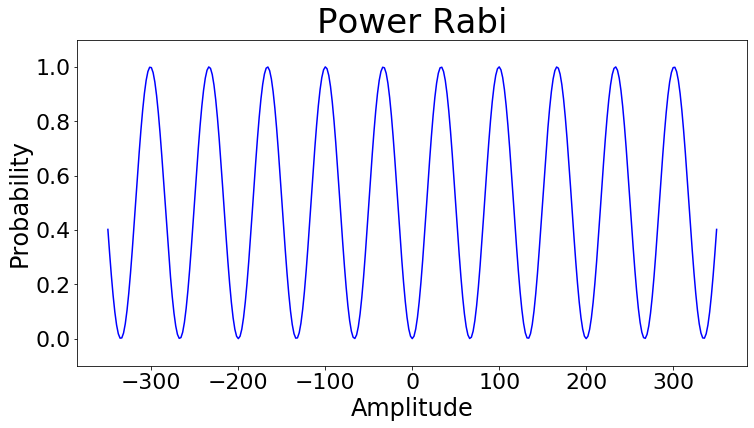

In [44]:
fig, ax = plt.subplots(figsize=(12,6))
plt.rcParams.update({'font.size': 22});
ax.plot(amps, x, 'b')
ax.set_xlabel('Amplitude',fontsize=24)
ax.set_ylabel('Probability',fontsize=24);
plt.ylim([-.1,1.1]);
plt.title("Power Rabi",fontsize=34);

In [87]:
#Define photon dissapation
c_ops_dis1 = []
kappa_dis1 = np.power(1.0e1,-1)#microseconds
c_ops_dis1.append(np.sqrt(kappa_dis1)*A)

In [102]:
%%time
tlist_dis = np.linspace(0,50,1000)
options = Options(atol=1e-12, rtol=1e-12,max_step=1e-4)
result_redrive_test = mesolve(H,g,tlist_dis,c_ops_dis1,args={'A': 18.0,'s':0.05},options=options)
t_e = np.zeros(len(result_redrive_test.states))
for index in range(len(result_redrive_test.states)):
    t_e[index] = expect(e*e.dag(),result_redrive_test.states[index])


CPU times: user 3.32 s, sys: 8.49 ms, total: 3.33 s
Wall time: 3.33 s


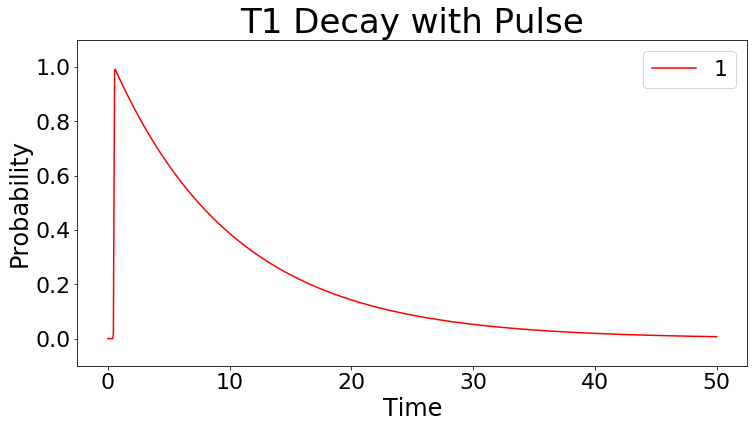

In [105]:
fig, ax = plt.subplots(figsize=(12,6))
plt.rcParams.update({'font.size': 22});
ax.plot(tlist_dis, t_e, 'r')
ax.legend(("1"))
ax.set_xlabel('Time',fontsize=24)
ax.set_ylabel('Probability',fontsize=24);
plt.ylim([-.1,1.1]);
plt.title("T1 Decay with Pulse",fontsize=34);